In [3]:
import tensorflow as tf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2

#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics

In [1]:
train = pd.read_csv("train.csv")
train.shape

NameError: name 'pd' is not defined

In [ ]:
test = pd.read_csv("test.csv")
test.shape

(18799, 785)

In [ ]:
train.columns

Index(['45', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.524', '0.525', '0.526', '0.527', '0.528', '0.529', '0.530', '0.531',
       '0.532', '0.533'],
      dtype='object', length=785)

In [ ]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [ ]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((112799, 784), (112799,), (18799, 784), (18799,))

In [ ]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [ ]:
#Flip and rotate

train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 28, 28)
test_x: (18799, 28, 28)


In [ ]:
# Normalise

train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [ ]:
mapp = pd.read_csv("map.txt", delimiter = ' ', \
                   index_col=0, header=None, squeeze=True)
mapp.shape

(47,)

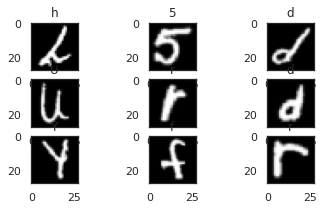

In [ ]:
# plot image

for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(chr(mapp[train_y[i]]))

In [ ]:
num_classes = train_y.nunique()

In [ ]:
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [ ]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [ ]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator()
datagen.fit(train_x)
train_gen = datagen.flow(train_x, train_y, batch_size=32)

In [ ]:
history = model.fit_generator(train_gen, steps_per_epoch=len(train_x)/32, epochs=20, \
                             validation_data=(val_x, val_y),)

Epoch 1/20
  21/3172 [..............................] - ETA: 16s - loss: 0.3722 - accuracy: 0.8705

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


3172/3172 [==============================] - 15s 5ms/step - loss: 0.3512 - accuracy: 0.8723 - val_loss: 0.3490 - val_accuracy: 0.8773
Epoch 2/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3444 - accuracy: 0.8754 - val_loss: 0.3576 - val_accuracy: 0.8770
Epoch 3/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3360 - accuracy: 0.8762 - val_loss: 0.3548 - val_accuracy: 0.8815
Epoch 4/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3275 - accuracy: 0.8806 - val_loss: 0.3633 - val_accuracy: 0.8799
Epoch 5/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3198 - accuracy: 0.8826 - val_loss: 0.3531 - val_accuracy: 0.8794
Epoch 6/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3148 - accuracy: 0.8835 - val_loss: 0.3619 - val_accuracy: 0.8804
Epoch 7/20
3172/3172 [==============================] - 15s 5ms/step - loss: 0.3079 - accuracy: 0.8848 - val_loss: 0.3685 - val_accuracy: 0.8

In [ ]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.42865073680877686
Test accuracy: 0.8791425228118896


In [ ]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

In [ ]:
cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[357,   0,   0, ...,   0,   0,   0],
       [168, 181,   0, ...,   0,   0,   0],
       [  1,   0, 352, ...,   0,   0,   0],
       ...,
       [ 51,   0,   0, ..., 205,   0,   0],
       [  2,   0,   0, ...,   0, 368,   0],
       [  9,   0,   0, ...,   0,   2, 358]])

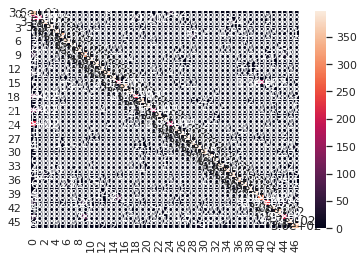

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

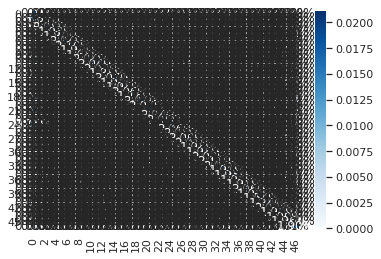

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
model.save('char_learner01_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive/Colab\ Notebooks/

char_learner.ipynb  data  digit_learner.ipynb


In [ ]:
model.save('/content/gdrive/MyDrive/Colab\ Notebooks/char_learner01_model.h5')